In [70]:
from io import StringIO
import os
import boto3
import pandas as pd
pd.set_option("display.max_columns", 50)
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
aws_access_key_id = os.getenv('AWS_ACCESS_KEY')
aws_secret_key = os.getenv('AWS_SECRET_KEY')

In [72]:
def read_csv_from_s3(bucket: str, path: str, file_name: str) -> pd.DataFrame:
    """Reads a CSV file from an S3 bucket and returns it as a DataFrame.

    Parameters
    ----------
    bucket : str
        The name of the S3 bucket.
    path : str
        The key (path) of the CSV file in the S3 bucket where the file is located.
    file_name: str
        The name of the csv file.

    Returns
    -------
    pd.DataFrame
        The DataFrame containing the data from the CSV file.
    """
    s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key= aws_secret_key)


    full_path = f'{path}{file_name}'

    object = s3.get_object(Bucket=bucket, Key=full_path)
    object = object['Body'].read().decode('utf-8')
    output_df = pd.read_csv(StringIO(object))
    
    return output_df

In [73]:
s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key= aws_secret_key)

bucket = 'de-chicago-taxi'

# Folders path
payment_type_path = 'transformed_data/payment_type/' 
company_path = 'transformed_data/company/'
date_path = 'transformed_data/date/'
community_areas_path = 'transformed_data/community_areas/'
taxi_trips_path = 'transformed_data/taxi_trips/'
weather_path = 'transformed_data/weather/'

# Read csv from s3
payment_type = read_csv_from_s3(bucket=bucket, path=payment_type_path, file_name='payment_type_master.csv')
company = read_csv_from_s3(bucket=bucket, path=company_path, file_name='company_master.csv')
date = read_csv_from_s3(bucket=bucket, path=date_path, file_name='date.csv')
community_areas = read_csv_from_s3(bucket=bucket, path=community_areas_path, file_name='community_areas_master.csv')

In [74]:
taxi_trips_list = []
weather_list = []

In [75]:
# Taxi data transformation and loading
for file in s3.list_objects(Bucket=bucket, Prefix=taxi_trips_path)['Contents']:
    taxi_key = file['Key']
    
    if taxi_key.split('/')[-1].strip() != '':
        if taxi_key.endswith('.csv'):

            file_name = taxi_key.split('/')[-1]
            trip = read_csv_from_s3(bucket = bucket, path = taxi_trips_path, file_name= file_name)
            taxi_trips_list.append(trip)
            print(f'{file_name} added')  


taxi_2025-01-26.csv added
taxi_2025-01-27.csv added
taxi_2025-01-28.csv added
taxi_2025-01-29.csv added
taxi_2025-01-30.csv added
taxi_2025-01-31.csv added
taxi_2025-02-01.csv added
taxi_2025-02-02.csv added
taxi_2025-02-03.csv added
taxi_2025-02-04.csv added
taxi_2025-02-05.csv added
taxi_2025-02-06.csv added
taxi_2025-02-07.csv added


In [76]:
trips = pd.concat(taxi_trips_list, ignore_index= True)

In [77]:
trips.to_csv("taxi_trips.csv")

In [78]:
trips.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,dropoff_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id
0,8b41dd2c196bf2ff7c719e41b34d97371ce16c2d,c380f12a04a89cc0e1ec1fb024710f170f212d5211635d...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,1150,13.66,76,6,34.25,9.69,0.0,4.0,48.44,41.980264,-87.913625,41.944227,-87.655998,2025-01-26 23:00:00,2,4
1,fa642029e8d5cc6bef8fc4b45766998f84401323,f451123ff58e8ef1ca5e64de85da57d7cf463c5ee73e6a...,2025-01-26T23:45:00.000,2025-01-27T00:15:00.000,1423,11.15,6,35,30.00,0.00,0.0,0.0,30.00,41.944227,-87.655998,41.835118,-87.618678,2025-01-26 23:00:00,4,8
2,e85140ec9f81979d43b8ef97aec15b1fe3d65540,1bb875f74db6b3d8bcab27f6784218036ec738c201e533...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,1256,12.04,76,2,30.75,0.00,0.0,5.0,35.75,41.980264,-87.913625,42.001571,-87.695013,2025-01-26 23:00:00,1,2
3,daac45b8ff5a7c626f2be0598c7db3c074c74311,e394089d397e0007d9a4154fa7f6936aba7bd6052e892e...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,1593,20.98,18,44,61.10,0.00,0.0,0.0,61.10,41.929297,-87.798032,41.740206,-87.615970,2025-01-26 23:00:00,1,2
4,d55b846bf05002b9feafd7a845859f104cd2102b,42560393a9c9b9ae28339f4b5aec77fd89bd49916ad541...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,932,5.45,32,7,17.25,0.00,0.0,1.0,18.25,41.878866,-87.625192,41.922686,-87.649489,2025-01-26 23:00:00,1,16


In [79]:

# Weather data transformation and loading
for file in s3.list_objects(Bucket=bucket, Prefix=weather_path)['Contents']:
    weather_key = file['Key']

    if weather_key.split('/')[-1].strip() != '':
        if weather_key.split('.')[1] == 'csv':
            
            file_name = weather_key.split('/')[-1]
            weather = read_csv_from_s3(bucket = bucket, path = weather_path, file_name= file_name)
            weather_list.append(weather)
            print(f'{file_name} added')


weather_2025-01-27.csv added
weather_2025-01-28.csv added
weather_2025-01-29.csv added
weather_2025-01-30.csv added
weather_2025-01-31.csv added
weather_2025-02-01.csv added
weather_2025-02-02.csv added
weather_2025-02-03.csv added
weather_2025-02-04.csv added
weather_2025-02-05.csv added
weather_2025-02-06.csv added
weather_2025-02-07.csv added
weather_data_date.csv added


In [80]:
weather_all = pd.concat(weather_list, ignore_index= True)

In [81]:
weather_all.to_csv("weather.csv")

In [82]:
trips.head()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area_id,dropoff_community_area_id,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,payment_type_id,company_id
0,8b41dd2c196bf2ff7c719e41b34d97371ce16c2d,c380f12a04a89cc0e1ec1fb024710f170f212d5211635d...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,1150,13.66,76,6,34.25,9.69,0.0,4.0,48.44,41.980264,-87.913625,41.944227,-87.655998,2025-01-26 23:00:00,2,4
1,fa642029e8d5cc6bef8fc4b45766998f84401323,f451123ff58e8ef1ca5e64de85da57d7cf463c5ee73e6a...,2025-01-26T23:45:00.000,2025-01-27T00:15:00.000,1423,11.15,6,35,30.00,0.00,0.0,0.0,30.00,41.944227,-87.655998,41.835118,-87.618678,2025-01-26 23:00:00,4,8
2,e85140ec9f81979d43b8ef97aec15b1fe3d65540,1bb875f74db6b3d8bcab27f6784218036ec738c201e533...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,1256,12.04,76,2,30.75,0.00,0.0,5.0,35.75,41.980264,-87.913625,42.001571,-87.695013,2025-01-26 23:00:00,1,2
3,daac45b8ff5a7c626f2be0598c7db3c074c74311,e394089d397e0007d9a4154fa7f6936aba7bd6052e892e...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,1593,20.98,18,44,61.10,0.00,0.0,0.0,61.10,41.929297,-87.798032,41.740206,-87.615970,2025-01-26 23:00:00,1,2
4,d55b846bf05002b9feafd7a845859f104cd2102b,42560393a9c9b9ae28339f4b5aec77fd89bd49916ad541...,2025-01-26T23:45:00.000,2025-01-27T00:00:00.000,932,5.45,32,7,17.25,0.00,0.0,1.0,18.25,41.878866,-87.625192,41.922686,-87.649489,2025-01-26 23:00:00,1,16


Join together

In [83]:
trips_full = pd.merge(trips, weather_all, left_on='datetime_for_weather', right_on= 'datetime', how='inner')
trips_full = trips_full.drop(columns=['datetime'])

In [84]:
trips_full = pd.merge(trips_full, payment_type, left_on='payment_type_id', right_on= 'payment_type_id', how='inner')
trips_full = trips_full.drop(columns=['payment_type_id'])

In [85]:
trips_full = pd.merge(trips_full, company, left_on='company_id', right_on= 'company_id', how='inner')
trips_full = trips_full.drop(columns=['company_id'])

In [86]:
trips_full = pd.merge(trips_full, community_areas, left_on='pickup_community_area_id', right_on= 'area_code', how='inner')
trips_full = trips_full.drop(columns=['pickup_community_area_id'])
trips_full.rename(columns={'community_name': 'pickup_community_area_name'}, inplace=True)

In [87]:
trips_full = pd.merge(trips_full, community_areas, left_on='dropoff_community_area_id', right_on= 'area_code', how='inner')
trips_full = trips_full.drop(columns=['dropoff_community_area_id'])
trips_full.rename(columns={'community_name': 'dropoff_community_area_name'}, inplace=True)

In [88]:
date['Date'] = pd.to_datetime(date['Date'])
trips_full['trip_start_timestamp'] = pd.to_datetime(trips_full['trip_start_timestamp'])

trips_full['trip_start_date'] = trips_full['trip_start_timestamp'].dt.date
trips_full['trip_start_date'] = pd.to_datetime(trips_full['trip_start_date'])

In [89]:
trips_full = pd.merge(trips_full, date, left_on='trip_start_date', right_on='Date', how= 'inner')
trips_full.drop(columns=['Date'])

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,datetime_for_weather,tempereature,wind_speed,rain,precipitation,payment_type,company,area_code_x,pickup_community_area_name,area_code_y,dropoff_community_area_name,trip_start_date,year,month,day,day_of_week,is_weekend
0,b6c97df4582a3db4e42b6a2f07d6a7dfec9024ea,1a248eb87ae578f15af2a14c2eb7b4b264f6babab9ad9c...,2025-01-27 23:45:00,2025-01-28T00:15:00.000,1184,8.54,23.50,0.00,0.0,0.0,23.50,41.899602,-87.633308,42.009623,-87.670167,2025-01-27 23:00:00,2.8,23.6,0.0,0.0,Cash,Sun Taxi,8,Near North Side,1,Rogers Park,2025-01-27,2025,1,27,1,False
1,011a41f51b68f9f592efb350f8b213036e78c394,75cf3a53aae5e5858361a7ca64f75d3407dc0a44d7bc42...,2025-01-27 23:45:00,2025-01-28T00:00:00.000,523,1.93,8.50,1.16,0.0,0.0,10.16,41.874005,-87.663518,41.899602,-87.633308,2025-01-27 23:00:00,2.8,23.6,0.0,0.0,Mobile,Flash Cab,28,Near West Side,8,Near North Side,2025-01-27,2025,1,27,1,False
2,0b784a0e44a7fdf5d74553ccb5f58f2eebc08295,a4aa774267d068ec480649bab24c35ae8ea10b6149a81b...,2025-01-27 23:45:00,2025-01-28T00:15:00.000,1321,16.65,41.25,11.44,0.0,4.0,57.19,41.980264,-87.913625,41.899602,-87.633308,2025-01-27 23:00:00,2.8,23.6,0.0,0.0,Credit Card,Sun Taxi,76,O'Hare,8,Near North Side,2025-01-27,2025,1,27,1,False
3,16ebadb9f5ff9deeac420551c51f8ccfa5fbdc2d,2f4e29a2c83f6b9c2b8ce735865fdddf49627f8d60bbff...,2025-01-27 23:45:00,2025-01-28T00:00:00.000,829,12.87,32.25,0.00,0.0,1.0,33.25,41.842076,-87.633973,41.968069,-87.721559,2025-01-27 23:00:00,2.8,23.6,0.0,0.0,Prcard,5 Star Taxi,34,Armour Square,14,Albany Park,2025-01-27,2025,1,27,1,False
4,1a0c832a5b3c7b467bd415d0fad69daae6e2ec77,13211c2747462616a339ca520978b83ccd7fe5c490b860...,2025-01-27 23:45:00,2025-01-28T00:15:00.000,2040,21.20,52.00,10.00,0.0,4.0,66.00,41.792592,-87.769615,42.009623,-87.670167,2025-01-27 23:00:00,2.8,23.6,0.0,0.0,Credit Card,Taxi Affiliation Services,56,Garfield Ridge,1,Rogers Park,2025-01-27,2025,1,27,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165002,b744bf3e99135cdca55993a4f310766acac94495,d744f003d8f56f6a8b53b97c0589575fa9a975e9d12f66...,2025-02-07 00:00:00,2025-02-07T00:15:00.000,1059,11.38,29.25,0.00,0.0,0.0,29.25,41.842076,-87.633973,41.890609,-87.756047,2025-02-07 00:00:00,2.2,24.1,0.0,0.0,Prcard,5 Star Taxi,34,Armour Square,25,Austin,2025-02-07,2025,2,7,5,False
165003,bdfa681492590439f6f2802494d180e28d0c897d,dd2844d5f13c91c2d50ff5092bacd0f339c5b3c17376b5...,2025-02-07 00:00:00,2025-02-07T00:15:00.000,721,1.99,9.25,0.00,0.0,0.0,9.25,41.944227,-87.655998,41.922686,-87.649489,2025-02-07 00:00:00,2.2,24.1,0.0,0.0,Cash,City Service,6,Lake View,7,Lincoln Park,2025-02-07,2025,2,7,5,False
165004,c0b5264e23c7e64d087b822ac5ec985d850e9abc,bebdd992c4a9275f26e83e00649616f188674dc151a82f...,2025-02-07 00:00:00,2025-02-07T00:30:00.000,1521,14.65,37.00,8.30,0.0,4.0,49.80,41.980264,-87.913625,41.944227,-87.655998,2025-02-07 00:00:00,2.2,24.1,0.0,0.0,Credit Card,City Service,76,O'Hare,6,Lake View,2025-02-07,2025,2,7,5,False
165005,c62da23c9212a585004f5bc720e1009feb2217e7,93816bb2c2c7ea5d8c849cb02fc6fd3fac15aa07d8be71...,2025-02-07 00:00:00,2025-02-07T00:15:00.000,1112,15.27,38.00,4.00,0.0,4.0,46.50,41.980264,-87.913625,41.901207,-87.676356,2025-02-07 00:00:00,2.2,24.1,0.0,0.0,Mobile,Taxicab Insurance Agency Llc,76,O'Hare,24,West Town,2025-02-07,2025,2,7,5,False


In [90]:
trips_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165007 entries, 0 to 165006
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   trip_id                      165007 non-null  object        
 1   taxi_id                      165007 non-null  object        
 2   trip_start_timestamp         165007 non-null  datetime64[ns]
 3   trip_end_timestamp           165007 non-null  object        
 4   trip_seconds                 165007 non-null  int64         
 5   trip_miles                   165007 non-null  float64       
 6   fare                         165007 non-null  float64       
 7   tips                         165007 non-null  float64       
 8   tolls                        165007 non-null  float64       
 9   extras                       165007 non-null  float64       
 10  trip_total                   165007 non-null  float64       
 11  pickup_centroid_latitude  

### Data visualisation

Trip Duration by Time of Day

In [91]:
trips_full['trip_end_timestamp'] = pd.to_datetime(trips_full['trip_end_timestamp'])
trips_full['trip_duration_min'] = (trips_full['trip_end_timestamp'] - trips_full['trip_start_timestamp']).dt.total_seconds() / 60
trips_full['start_hour'] = trips_full['trip_start_timestamp'].dt.hour

In [92]:
trips_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165007 entries, 0 to 165006
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   trip_id                      165007 non-null  object        
 1   taxi_id                      165007 non-null  object        
 2   trip_start_timestamp         165007 non-null  datetime64[ns]
 3   trip_end_timestamp           165007 non-null  datetime64[ns]
 4   trip_seconds                 165007 non-null  int64         
 5   trip_miles                   165007 non-null  float64       
 6   fare                         165007 non-null  float64       
 7   tips                         165007 non-null  float64       
 8   tolls                        165007 non-null  float64       
 9   extras                       165007 non-null  float64       
 10  trip_total                   165007 non-null  float64       
 11  pickup_centroid_latitude  

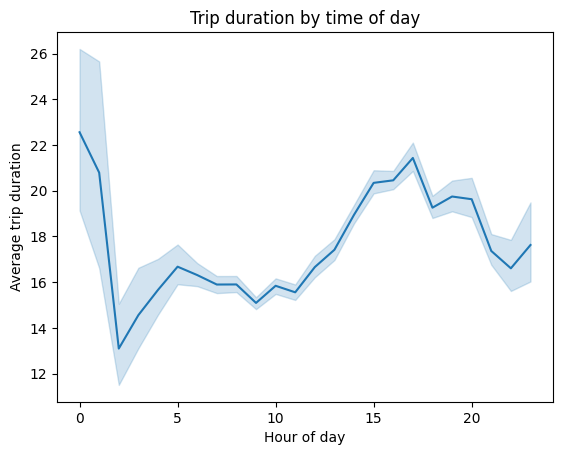

In [93]:

sns.lineplot(data=trips_full, x='start_hour', y='trip_duration_min')
plt.title('Trip duration by time of day')
plt.xlabel('Hour of day')
plt.ylabel('Average trip duration')
plt.show()

Hourly Ride Distribution

In [94]:
hourly_counts = trips_full.groupby('start_hour').size().reset_index(name='number_of_trips')

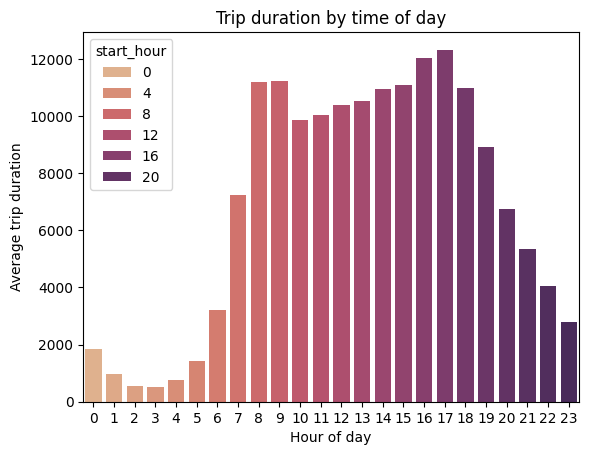

In [95]:
sns.barplot(x='start_hour', y='number_of_trips', hue='start_hour', data=hourly_counts, palette='flare')
plt.title('Trip duration by time of day')
plt.xlabel('Hour of day')
plt.ylabel('Average trip duration')
plt.show()

Rides per Day of Week

In [96]:
#trips_full['day_of_week'] = trips_full['trip_start_timestamp'].dt.day_name()

In [97]:

trips_full['weekday_number'] = trips_full['trip_start_timestamp'].dt.dayofweek
trips_full['weekday_name'] = trips_full['trip_start_timestamp'].dt.day_name()

trips_per_day = trips_full.groupby(['weekday_number', 'weekday_name']).size().reset_index(name='number_of_trips')

trips_per_day = trips_per_day.sort_values('weekday_number')

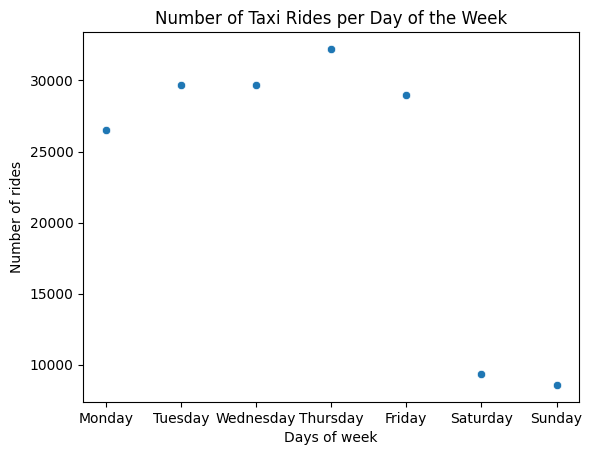

In [98]:
sns.scatterplot(x='weekday_name', y='number_of_trips', data=trips_per_day)
plt.title('Number of Taxi Rides per Day of the Week')
plt.xlabel('Days of week')
plt.ylabel('Number of rides')
plt.show()

Total Fare by Company

In [99]:
total_fare_by_company = trips_full.groupby('company')['trip_total'].sum().reset_index()
total_fare_by_company = total_fare_by_company.sort_values('trip_total', ascending=False)

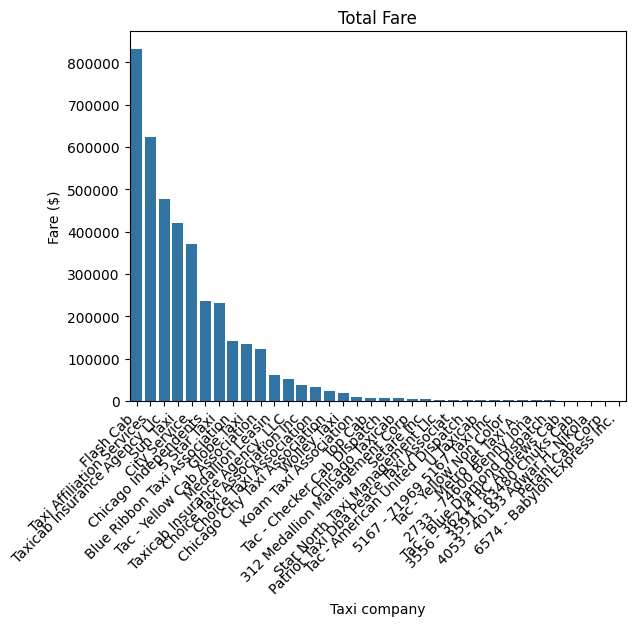

In [100]:
sns.barplot(x='company', y='trip_total', data=total_fare_by_company)
plt.title('Total Fare')
plt.xlabel('Taxi company')
plt.ylabel('Fare ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Fare amounts by payment type.



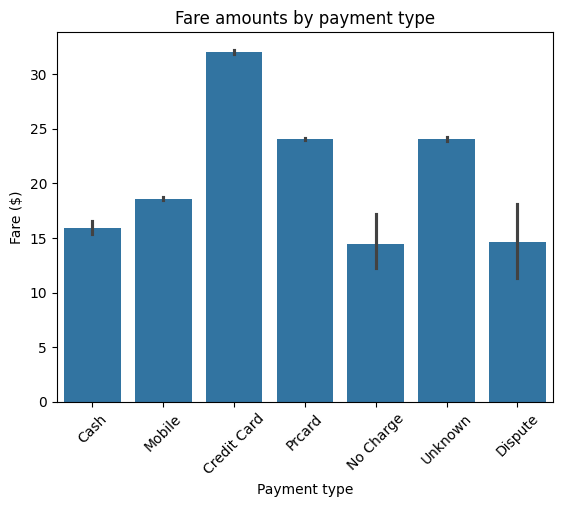

In [101]:
sns.barplot(x='payment_type', y='trip_total', data=trips_full)
plt.title('Fare amounts by payment type')
plt.xlabel('Payment type')
plt.ylabel('Fare ($)')
plt.xticks(rotation=45)
plt.show()